In [ ]:
# Importing required libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings

In [3]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn import feature_selection as fs
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from scipy import stats

In [ ]:
# Loading Dataset

In [5]:
abalone= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [6]:
abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [ ]:
# checking for null values in the dataset

In [9]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

It means there is no NULL values in the dataset.

In [7]:
#Descriptive statistic table
abalone.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

Based on the above table,
1.we have a clear view of the dataset which has 4177 observations with 9 features. Since the dataset is seems to be clean, we can use this for machine learning process.

2.The feature Sex is missing. This is because the values of Sex are categorical and categorical values do not have means and percentiles.

Target Attribute here is Rings ; above analysis shows that the value of rings can range from 1 to 29.

In [ ]:
# First compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings

In [10]:
abalone['age'] = abalone['Rings']+1.5
abalone.drop('Rings', axis = 1, inplace = True)

In [11]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

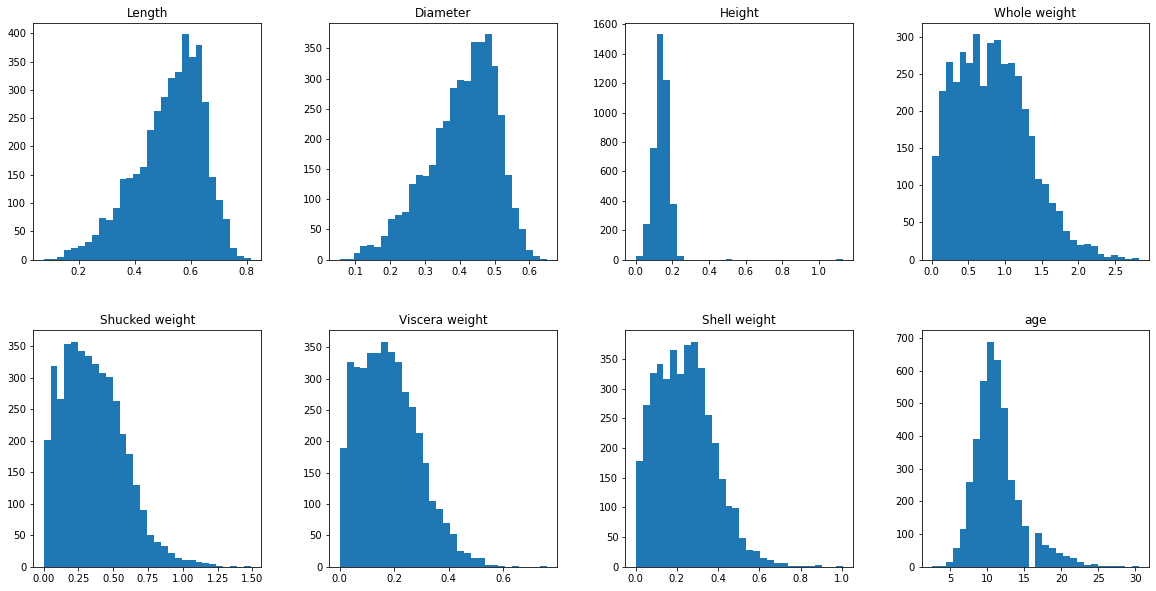

In [12]:
abalone.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [13]:
numerical_features = abalone.select_dtypes(include=[np.number]).columns
categorical_features = abalone.select_dtypes(include=[np.object]).columns

In [14]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [15]:
categorical_features

Index(['Sex'], dtype='object')

For ML models it is difficult to work with values of different dtypes (such as both categorical and numeric,as is the case here) at the same time. To deal with this we will convert Sex by doing encoding which is basically converting a categorical feature into binary numeric feature(s) indicating the presence or absence of the values that were originally there in the categorical feature

In [18]:
skew_values = skew(abalone[numerical_features])

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

Features  Skewness degree
2          Height         3.127694
7             age         1.113702
4  Shucked weight         0.718840
6    Shell weight         0.620704
5  Viscera weight         0.591640
3    Whole weight         0.530768
1        Diameter        -0.608979
0          Length        -0.639643

- For normal distribution, the skewness should be almost 0. For unimodal continuous distributions, skewness value > 0; means    that there is more weight in the right tail of the distribution. 
The function skewtest can be used to determine if the skewness value is close enough to 0.
- Height is the highest skewed followed by age, Shucked weight (can be cross verified through histogram plot)

<AxesSubplot:xlabel='Sex', ylabel='count'>

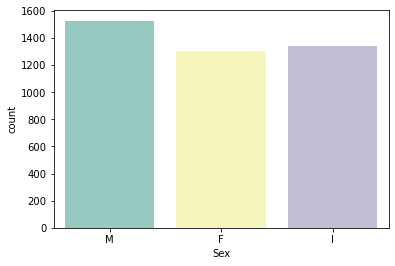

In [20]:
sns.countplot(x = 'Sex', data = abalone, palette="Set3")

In [22]:
# grouping data by categorical variable Sex

abalone.groupby('Sex')[
    ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'age']
                      ].mean().sort_values('age')

Length  Diameter    Height  Whole weight  Shucked weight  \
Sex                                                               
I    0.427746  0.326494  0.107996      0.431363        0.191035   
M    0.561391  0.439287  0.151381      0.991459        0.432946   
F    0.579093  0.454732  0.158011      1.046532        0.446188   

     Viscera weight  Shell weight        age  
Sex                                           
I          0.092010      0.128182   9.390462  
M          0.215545      0.281969  12.205497  
F          0.230689      0.302010  12.629304

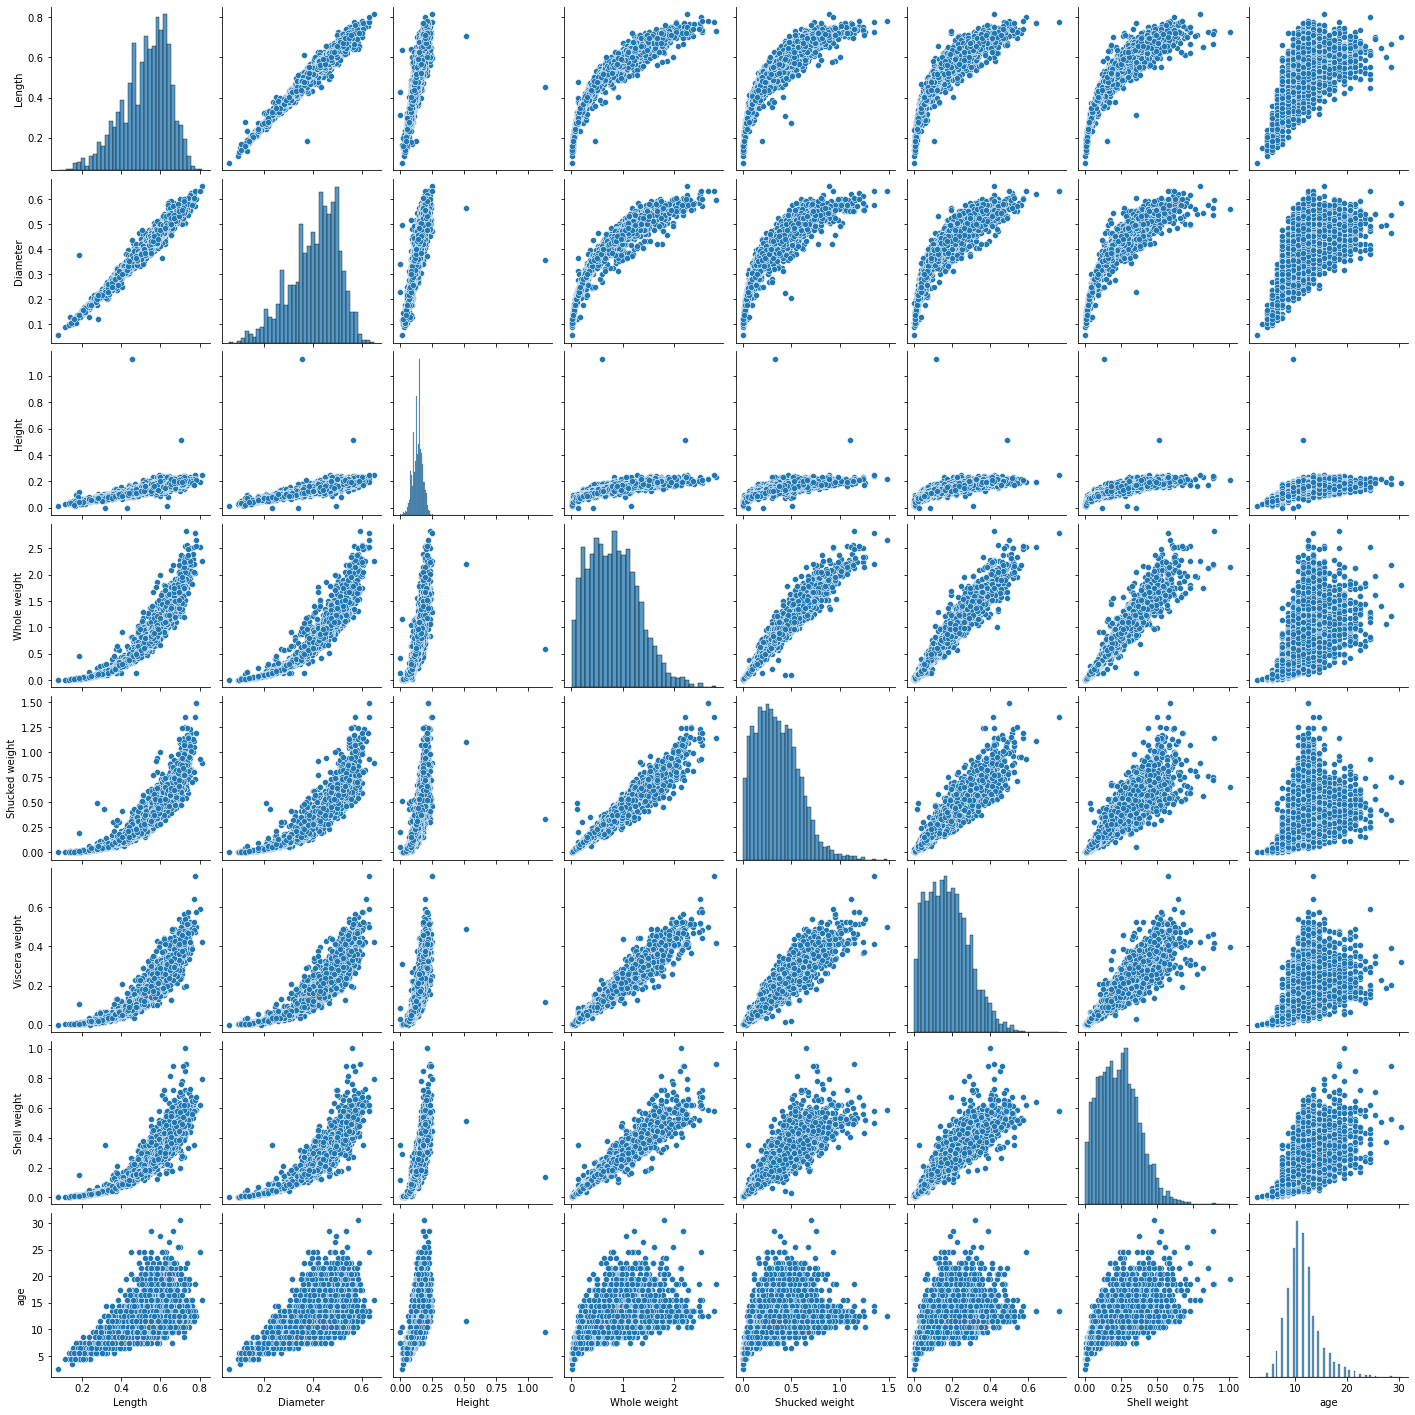

In [23]:
sns.pairplot(abalone[numerical_features])

From above plotting, we can observe that there is linear correlation between length and diameter, and some
relation with height, whole weight, shucked weight, viscera weight and shell weight.

<AxesSubplot:>

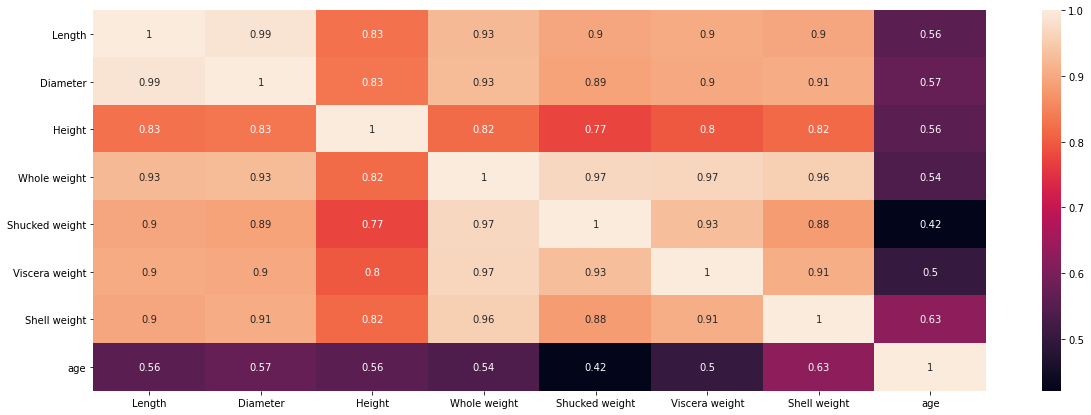

In [25]:
# For closer look at correlation; we go through the Heatmap

plt.figure(figsize=(20,7))
sns.heatmap(abalone[numerical_features].corr(), annot=True)

Observations:
    1.Whole Weight is almost linearly correlated with all other features except age. 
    2.Age is most linearly proprtional with Shell Weight followed by Diameter and length.
    3.Age is least correlated with Shucked Weight.

Note: Such high correlation coefficients among features can result into multi-collinearity. We need to check for that

In [26]:
# Outlier Handling

abalone = pd.get_dummies(abalone)
dummy_abalone = abalone.copy()

<AxesSubplot:>

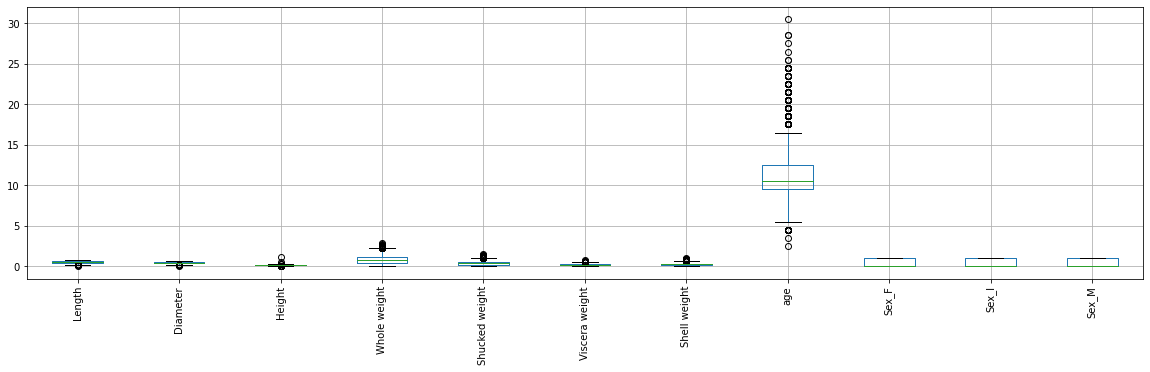

In [27]:
abalone.boxplot( rot = 90, figsize=(20,5))

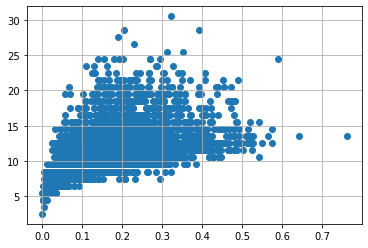

In [28]:
var = 'Viscera weight'
plt.scatter(x = abalone[var], y = abalone['age'],)
plt.grid(True)

In [29]:
# Removing Outliers

abalone.drop(abalone[(abalone['Viscera weight']> 0.5) & (abalone['age'] < 20)].index, inplace=True)
abalone.drop(abalone[(abalone['Viscera weight']<0.5) & (abalone['age'] > 25)].index, inplace=True)

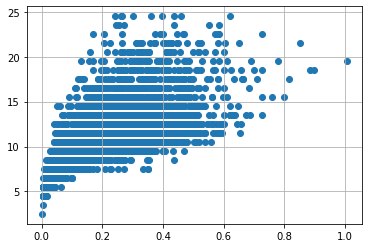

In [30]:
var = 'Shell weight'
plt.scatter(x = abalone[var], y = abalone['age'],)
plt.grid(True)

In [31]:
abalone.drop(abalone[(abalone['Shell weight']> 0.6) & (abalone['age'] < 25)].index, inplace=True)
abalone.drop(abalone[(abalone['Shell weight']<0.8) & (abalone['age'] > 25)].index, inplace=True)

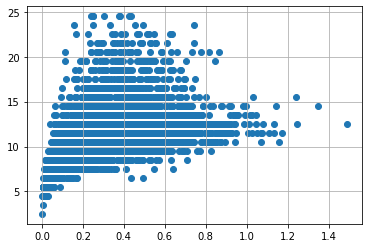

In [32]:
var = 'Shucked weight'
plt.scatter(x = abalone[var], y = abalone['age'],)
plt.grid(True)

In [33]:
abalone.drop(abalone[(abalone['Shucked weight']>= 1) & (abalone['age'] < 20)].index, inplace=True)
abalone.drop(abalone[(abalone['Shucked weight']<1) & (abalone['age'] > 20)].index, inplace=True)

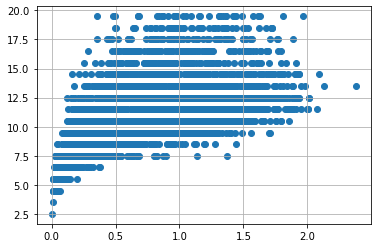

In [34]:
var = 'Whole weight'
plt.scatter(x = abalone[var], y = abalone['age'],)
plt.grid(True)

In [35]:
abalone.drop(abalone[(abalone['Whole weight']>= 2.5) & (abalone['age'] < 25)].index, inplace=True)
abalone.drop(abalone[(abalone['Whole weight']<2.5) & (abalone['age'] > 25)].index, inplace=True)

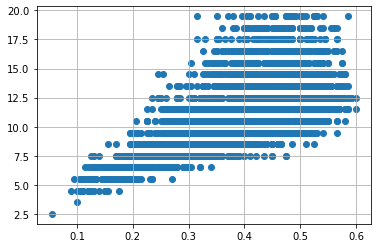

In [36]:
var = 'Diameter'
plt.scatter(x = abalone[var], y = abalone['age'],)
plt.grid(True)

In [ ]:
abalone.drop(abalone[(abalone['Diameter']<0.1) & (abalone['age'] < 5)].index, inplace=True)

abalone.drop(abalone[(abalone['Diameter']<0.6) & (abalone['age'] > 25)].index, inplace=True)

abalone.drop(abalone[(abalone['Diameter']>=0.6) & (abalone['age']< 25)].index, inplace=True)

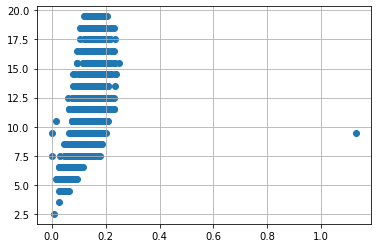

In [37]:
var = 'Height'
plt.scatter(x = abalone[var], y = abalone['age'],)
plt.grid(True)

In [ ]:
abalone.drop(abalone[(abalone['Height']>0.4) & (abalone['age'] < 15)].index, inplace=True)

abalone.drop(abalone[(abalone['Height']<0.4) & (abalone['age'] > 25)].index, inplace=True)

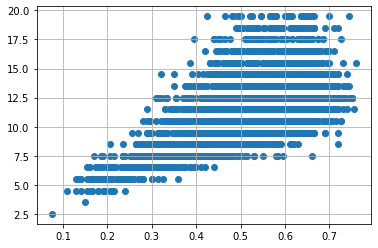

In [38]:
var = 'Length'
plt.scatter(x = abalone[var], y = abalone['age'],)
plt.grid(True)

In [39]:
abalone.drop(abalone[(abalone['Length']<0.1) & (abalone['age'] < 5)].index, inplace=True)

abalone.drop(abalone[(abalone['Length']<0.8) & (abalone['age'] > 25)].index, inplace=True)

abalone.drop(abalone[(abalone['Length']>=0.8) & (abalone['age']< 25)].index, inplace=True)

Data Preprocessing, Modelling, Evaluation

  - pre-processing 
  - selection of the model
  - modelling
  - hyperparamaters tunning using GridSearchCV
  - evaluation

In [64]:
abalone= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [67]:
abalone = pd.get_dummies(abalone)

In [68]:
abalone.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

In [69]:
#  we are training the model to predict Rings, we will remove it from our dataset and pass it separately.
Y = abalone["Rings"]
X = abalone.drop(columns="Rings")

We split the dataset into two: 
    -One for training known as the training data and 
    -One for evaluation known as the test data. 
    -We take split ratio as 80:20 .

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [74]:
# Initializing classifier and giving hyperparameter k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [75]:
# training classifier
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
# Evaluate the classifier

print(knn.score(X_test, Y_test))

0.22248803827751196


In [77]:
# Try changing hyperparameter

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))

0.22966507177033493


Accuracy for k=3 is 0.2224 and for k=5 is 0.2296

In [ ]:
# Logistic Regression

In [78]:
# Initializing classifier with one-v-rest approach. random_state is # to ensure same results in every execution.

logr = LogisticRegression(multi_class = 'ovr', random_state=3)

In [79]:
# training classifier

logr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=3)

In [81]:
# Evaluate the classifier

print(logr.score(X_test, Y_test))

0.2236842105263158


Here accuracy is 0.2236

In [ ]:
# Decision Tree

In [82]:
# Initializing classifier. random_state is to ensure same results in every execution. max_depth is to specify number of splits
dt = DecisionTreeClassifier(random_state=0, max_depth = 3)

# training classifier
dt.fit(X_train, Y_train)

# Evaluate the classifier
print(dt.score(X_test, Y_test))

0.25239234449760767


In [ ]:
Accuracy is 0.2523